#Session will start at 10:10am. Let everyone join.

In [ ]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset in jupyter notebook
#Around100M+ ratings 4499 movies 480,000+ users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive  # will not work in jupyter
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix_dataset1 = pd.read_csv('/content/drive/MyDrive/Netflix csv/combined_data_1 (1).txt')
netflix_dataset1.head()

,,1:
1488844,3.0,2005-09-06
822109,5.0,2005-05-13
885013,4.0,2005-10-19
30878,4.0,2005-12-26
823519,3.0,2004-05-03


In [ ]:
# Reading dataset file
netflix_dataset = pd.read_csv('/content/drive/MyDrive/Netflix csv/combined_data_1 (1).txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset.head()


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [ ]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
netflix_dataset.isnull()

,Cust_Id,Rating
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24058258,False,False
24058259,False,False
24058260,False,False
24058261,False,False


In [ ]:
netflix_dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
# netflix_dataset['Rating']=netflix_dataset['Rating'].astype(float)

In [ ]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
movie_count=netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
#get the movie count with NaN values
movie_count= movie_count["Rating"]

In [ ]:
movie_count

4499

In [ ]:
#to calculate how many customers we are having in the dataset
customer_count = netflix_dataset['Cust_Id'].nunique()

In [ ]:
customer_count # this also include unique movie id's

475257

In [ ]:
#without movie ID's
actual_customer_count=customer_count-movie_count
actual_customer_count

466259

In [ ]:
netflix_dataset['Cust_Id'].count() # these are the number of times ratings given

24058263

In [ ]:
#get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count()-movie_count
rating_count

24053764

In [ ]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
# 1st method
netflix_dataset["Rating"].value_counts()

Rating
4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: count, dtype: int64

In [ ]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
# 2nd method
p = netflix_dataset.groupby('Rating')['Rating'].count()
p

Rating
1.0    1118186
2.0    2439073
3.0    6904181
4.0    8085741
5.0    5506583
Name: Rating, dtype: int64

In [ ]:
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
# 3rd method
stars=netflix_dataset.groupby('Rating')['Rating'].agg(['count'])

In [ ]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


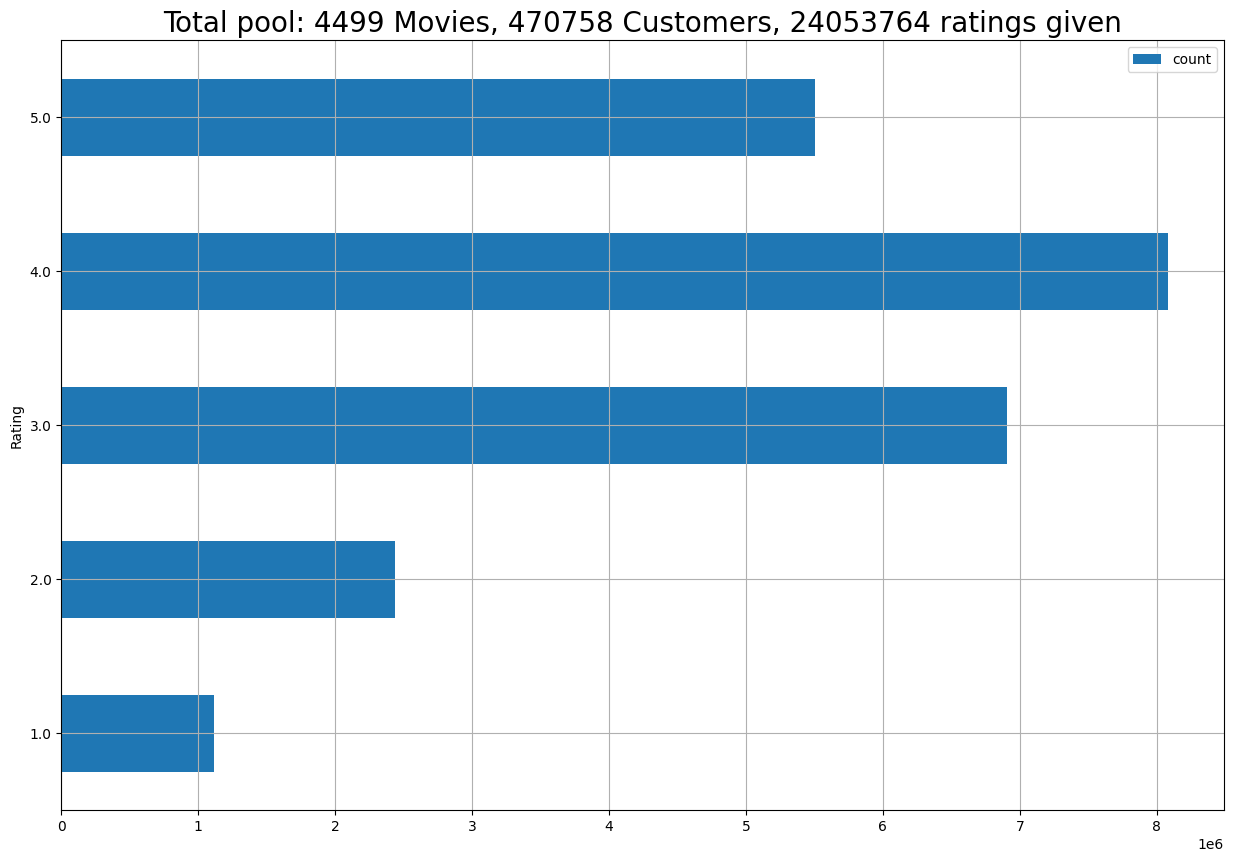

In [ ]:
ax=stars.plot(kind='barh',figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [ ]:
# Now we will try to make a another column of movie ID's
# For that first we will find on which indexes movie id's are present

In [ ]:
pd.isnull(netflix_dataset.Rating)

# True means a movie id is present and False means a customer id

0            True
1           False
2           False
3           False
4           False
            ...  
24058258    False
24058259    False
24058260    False
24058261    False
24058262    False
Name: Rating, Length: 24058263, dtype: bool

In [ ]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_nan = pd.DataFrame(pd.isnull(netflix_dataset.Rating))

In [ ]:
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_nan = df_nan[df_nan['Rating']==True]
df_nan

# These are all the indexes where a movie id is present

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df_nan.shape

(4499, 1)

In [ ]:
df_nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [ ]:
df_nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [ ]:
#now we will reset the index as the column
df_nan = df_nan.reset_index()

In [ ]:
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
df_nan['index'][0:-1]#will extract all the records from the index column except for the last index-- 4498

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [ ]:
df_nan['index'][1:]#this sytax will extract records from the index column from the 1st index

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [ ]:
np.full((1,3), '2.0') #working of full function

array([['2.0', '2.0', '2.0']], dtype='<U3')

In [ ]:
#working
x=zip(df_nan['index'][1:], df_nan['index'][:-1])
x

In [ ]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [ ]:
548 - 0 - 1 # for movie 1

547

In [ ]:
temp = np.full((1,547),1)
temp

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
694-548-1 # for movie 2

145

In [ ]:
temp=np.full((1,145), 2)
print(temp)

[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2]]


In [ ]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 548 to 693 and so on
# i-j-1 as we are not including first and last index of specific movie's as they are movie id's
movie_np = []
movie_id = 1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp = np.full((1, i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1 # movie id = movie id + 1

print(movie_np)

#account for last record and corresponding length
#numpy approach
last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1) , movie_id)#movie id will be 4499
movie_np=np.append(movie_np, last_record)

[1.000e+00 1.000e+00 1.000e+00 ... 4.498e+03 4.498e+03 4.498e+03]


In [ ]:
# example code for last record
import pandas as pd

# Create a dictionary with data
data = {
    'index': [10, 30, 50],
    'B': [20, 40, 60]
}

# Create the DataFrame
df_nan1 = pd.DataFrame(data)

# Print the DataFrame
print(df_nan1)


   index   B
0     10  20
1     30  40
2     50  60


In [ ]:
df_nan1.iloc[-1, 0]

50

In [ ]:
netflix_dataset = netflix_dataset[pd.notnull(netflix_dataset['Rating'])] # including all not null values of ratings coolumn

netflix_dataset['Movie_Id'] = movie_np.astype(int)
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)   # its a integer column
print("Now the dataset will look like: ")
netflix_dataset

<ipython-input-46-53949f88de99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Movie_Id'] = movie_np.astype(int)


Now the dataset will look like: 


<ipython-input-46-53949f88de99>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)   # its a integer column


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
netflix_dataset.tail()

,Cust_Id,Rating,Movie_Id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [ ]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers


In [ ]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
# Data cleaning

# we cannot remove duplicates for any column so we have so select benchmarks

# Two bench marks
# Customers who give less number of times ratings that could be fake, non active users, watch movies but don't give ratings
# so remove them
# movies who get less number of times ratings that movies are not much popular so will not recommend and remove them

In [ ]:
dataset_movie_summary=netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])

In [ ]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
# Benchmark

In [ ]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [ ]:
#now we will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [ ]:
# we are storing all the movies which we need to drop
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [ ]:
len(drop_movie_list)


3149

In [ ]:
#now we will remove all the users that are in-active
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [ ]:
# we are storing all the customers which we need to drop

drop_cust_list=dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=327300)

In [ ]:
len(drop_cust_list)

327300

In [ ]:
#we will remove all the customers and movies that are below the benchmark
print('The original dataframe has: ', netflix_dataset.shape, 'shape')

The original dataframe has:  (24053764, 3) shape


In [ ]:
netflix_dataset['Movie_Id'].isin(drop_movie_list)

1           True
2           True
3           True
4           True
5           True
            ... 
24058258    True
24058259    True
24058260    True
24058261    True
24058262    True
Name: Movie_Id, Length: 24053764, dtype: bool

In [ ]:
netflix_dataset = netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)] # ~ means NOT
netflix_dataset = netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (17337458, 3)


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [ ]:
list(netflix_dataset["Movie_Id"].unique())

[3,
 8,
 16,
 17,
 18,
 26,
 28,
 30,
 32,
 33,
 44,
 45,
 46,
 47,
 48,
 52,
 55,
 56,
 57,
 58,
 68,
 76,
 77,
 78,
 79,
 83,
 84,
 97,
 104,
 108,
 110,
 111,
 118,
 122,
 127,
 133,
 138,
 143,
 148,
 152,
 156,
 165,
 166,
 167,
 171,
 173,
 175,
 178,
 180,
 181,
 185,
 187,
 188,
 189,
 191,
 197,
 199,
 201,
 208,
 209,
 213,
 215,
 216,
 223,
 225,
 232,
 238,
 239,
 240,
 241,
 242,
 248,
 252,
 253,
 255,
 256,
 257,
 262,
 268,
 269,
 270,
 273,
 275,
 281,
 283,
 285,
 289,
 290,
 295,
 297,
 299,
 304,
 305,
 311,
 312,
 313,
 316,
 329,
 330,
 331,
 334,
 337,
 341,
 344,
 345,
 348,
 353,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 367,
 371,
 375,
 378,
 381,
 385,
 390,
 393,
 395,
 398,
 400,
 401,
 405,
 406,
 408,
 413,
 416,
 418,
 420,
 422,
 424,
 425,
 426,
 427,
 431,
 432,
 433,
 436,
 438,
 442,
 443,
 445,
 452,
 454,
 456,
 457,
 459,
 463,
 468,
 471,
 473,
 474,
 476,
 477,
 482,
 483,
 486,
 488,
 489,
 494,
 499,
 501,
 504,
 505,
 516,
 517,
 518,
 524

In [ ]:
import pandas as pd

In [ ]:
df_title = pd.read_csv("/content/drive/MyDrive/Netflix csv/movie_titles _1_ (2).csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [ ]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [ ]:
#df_title.iloc[:4499,:]

In [ ]:
!pip install scikit-surprise   #its a package used for recommendation

In [ ]:
#model building

import seaborn as sns
from surprise import Reader, Dataset, SVD  # Singular value decomposition
from surprise.model_selection import cross_validate

In [ ]:
# SVD performs dimensionality reduction for recommendation

In [ ]:
#help us to read the dataset for svd algo
reader=Reader()

# it will convert data frame into Pivot tables where columns will be movie ids and rows will be customers id

In [ ]:
#we only work with top 100K rows for quick runtime
data = Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000], reader)

In [ ]:
data

In [ ]:
model = SVD()  # create instance of SVD

In [ ]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

# Using Cv your model will become generalized

{'test_rmse': array([1.00368196, 0.99736739, 0.99374285, 0.99811361]),
 'test_mae': array([0.8081398 , 0.80392001, 0.79909945, 0.80214164]),
 'fit_time': (3.3794384002685547,
  3.05057430267334,
  5.966782808303833,
  4.9421985149383545),
 'test_time': (0.24223113059997559,
  0.4222438335418701,
  0.9783487319946289,
  0.25945544242858887)}

In [ ]:
#so first we take user 1331154 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_1331154=netflix_dataset[(netflix_dataset['Cust_Id'] ==1331154)& (netflix_dataset['Rating']==5)]
dataset_1331154

,Cust_Id,Rating,Movie_Id
458308,1331154,5.0,143
1184450,1331154,5.0,270
1991774,1331154,5.0,361
2369367,1331154,5.0,457
2600328,1331154,5.0,482
3417458,1331154,5.0,658
4029215,1331154,5.0,763
5646194,1331154,5.0,1144
7075510,1331154,5.0,1425
7423467,1331154,5.0,1476


In [ ]:

df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset

user_1331154 = df_title.copy()
user_1331154

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user_1331154 = user_1331154.reset_index()
user_1331154

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
user_1331154 = user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)
# .est -> estimation function
# x is the iterator which will go to every movie movie one by one

<ipython-input-103-d64a489ef759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_1331154['Estimate_Score']=user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154, x).est)


In [ ]:
user_1331154

,Movie_Id,Year,Name,Estimate_Score
2,3,1997.0,Character,3.947322
7,8,2004.0,What the #$*! Do We Know!?,4.049172
15,16,1996.0,Screamers,3.306164
16,17,2005.0,7 Seconds,2.916555
17,18,1994.0,Immortal Beloved,3.445336
...,...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.621282
17765,17767,2004.0,Fidel Castro: American Experience,3.621282
17766,17768,2000.0,Epoch,3.621282
17767,17769,2003.0,The Company,3.621282


In [ ]:
user_1331154=user_1331154.sort_values('Estimate_Score',ascending=False)
print(user_1331154)

       Movie_Id    Year                        Name  Estimate_Score
7             8  2004.0  What the #$*! Do We Know!?        4.049172
2             3  1997.0                   Character        3.947322
27           28  2002.0             Lilo and Stitch        3.861742
29           30  2003.0      Something's Gotta Give        3.694168
17767     17769  2003.0                 The Company        3.621282
...         ...     ...                         ...             ...
17768     17770  2003.0                Alien Hunter        3.621282
17           18  1994.0            Immortal Beloved        3.445336
15           16  1996.0                   Screamers        3.306164
16           17  2005.0                   7 Seconds        2.916555
25           26  2004.0             Never Die Alone        2.503009

[14620 rows x 4 columns]
